<a href="https://colab.research.google.com/github/Arjunt10/AER850Project3/blob/main/Step_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

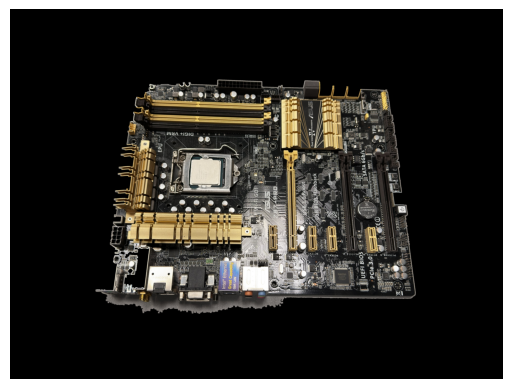

In [72]:
# -*- coding: utf-8 -*-
import cv2
import matplotlib.pyplot as plt
import numpy as np

" STEP 1: Object Masking "

"Read Image"
image_orig = cv2.imread(r"/content/drive/MyDrive/AER850 Project 3 Files/motherboard_image.JPEG")

"Rotate Image"
image_orig = cv2.rotate(image_orig,cv2.ROTATE_90_CLOCKWISE)

"Grayout Image"
image_gray = cv2.cvtColor(image_orig, cv2.COLOR_BGR2GRAY)

"Threshold"
_, image_gray = cv2.threshold(image_gray,100, 255, cv2.THRESH_BINARY)

"Edges & Image Dilation"
Edges = cv2.Canny (image_gray, 10, 150)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
Edges = cv2.dilate(Edges, kernel, iterations= 2)

"Contours"
contours, _ = cv2.findContours (Edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

"Mask"
max_contour = max(contours, key = cv2.contourArea)
mask = np.zeros_like(image_gray)
cv2.drawContours (mask, [max_contour], -1, 255, thickness = cv2.FILLED)

"Apply Mask on Original Image"
image_final = cv2.bitwise_and (image_orig, image_orig, mask = mask)
image_final = cv2.GaussianBlur(image_final, (5, 5), 0)

"Save Image"
cv2.imwrite(r"/content/drive/MyDrive/AER850 Project 3 Files/motherboard_image_final.JPEG", image_final)

"Show image"
plt.imshow(cv2.cvtColor(image_final, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
